# Lennard - Jones Model Plot

The purpose of this notebook is to create a function that can plot the Lennard-Jones Potential for any substance given initial parameters. To show the derivation of the Lennard-Jones potential, first we must discuss Square-Well potential.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import newton

## Square - Well Potential

Square-well potential is a simplistic model that describes some of the characteristics of two interacting particles. We know from observation and analysis, that you can only compress any material so far before it requires a very large amount of energy to compress further. This is important since it shows atomic repulusion after you reach a certain point. We also know that these particle interactions must be short-ranged, since a drop of water behaves the same as a litre of water. Using this we can arrive at a simple model by using a piece-wise function.

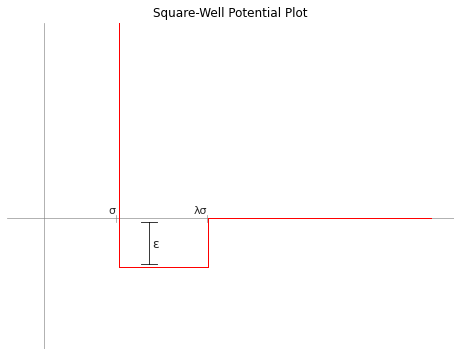

In [2]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.tick_params(left=False, bottom=False)                       ## Removal of initial axes
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['', '', '', ''])
ax.set_yticks([-2, -1, 0, 1, 2, 3])
ax.set_yticklabels(['', '', '', '', '', ''])
for side in ['top', 'bottom', 'left', 'right']:
    ax.spines[side].set_visible(False)
    
plt.title('Square-Well Potential Plot')                        ## Title and axes 
ax.axhline(color='grey', alpha=0.8, linewidth=0.75)
ax.axvline(0.25, color='grey', alpha=0.8, linewidth=0.75)


ax.axvline(0.75, ymin=0.25, color='red', linewidth=1)          ## The red line plot split up into seperate parts
ax.axhline(-0.75, xmin=0.25, xmax=0.45, color='red', linewidth=1)
ax.axvline(1.35, ymin=0.25, ymax=0.4, color='red', linewidth=1)
ax.axhline(0, xmin=0.45, xmax=0.95, color='red', linewidth=1)

ax.axvline(0.95, ymin=0.26, ymax=0.39, color='black', alpha=0.85, linewidth=0.9)   ## The ε label
ax.axhline(-0.7, xmin=0.3, xmax=0.335, color='black', alpha=0.85, linewidth=0.9)
ax.axhline(-0.05, xmin=0.3, xmax=0.335, color='black', alpha=0.85, linewidth=0.9)
ax.text(0.975, -0.45, 'ε', size=12.5, alpha=0.85)

ax.axvline(0.73, ymin=0.39, ymax=0.41, color='grey', alpha=0.8, linewidth=0.75)    ## The σ and λσ ticks
ax.axvline(1.34, ymin=0.39, ymax=0.41, color='grey', alpha=0.8, linewidth=0.75)
ax.text(0.68, 0.07, 'σ', size=11, alpha=0.85)
ax.text(1.25, 0.07, 'λσ', size=11, alpha=0.85)
plt.show()

This is a simple model, but it does show the defining characteristics of the Lennard-Jones model quite well. Here we can see the size of the particle `σ` and the depth of the potential well (or the dispersion energy) `ε`. Below, we will try to write a functin that models the Lennard-Jones potential for any substance.

## Lennard-Jones Potential

We can start to see the derivation for the Lennard-Jones when we combine the two functions on the plot below to obtain a general Lennard-Jones plot:

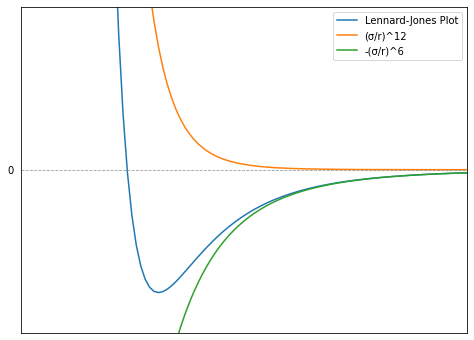

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
r = np.linspace(3.2, 15, 200)
eps = 113
sig = 3.433

ax.plot(r, (4*eps*((sig/r)**12 - (sig/r)**6)), label='Lennard-Jones Plot')
ax.plot(r, 4*eps*(sig/r)**12, label='(σ/r)^12')
ax.plot(r, -4*eps*(sig/r)**6, label='-(σ/r)^6')

ax.axhline(0, color='grey', alpha=0.8, linestyle='--', linewidth=0.8)
plt.xlim(2, 8)
ax.set_xticks([])
ax.tick_params(bottom=False)

plt.ylim(-150, 150)
ax.set_yticks([-100, 0, 100])
ax.set_yticklabels(['', 0, ''])
ax.tick_params(left=False)

ax.legend()
plt.show()

If we give the Lennard-Jones equation some initial parameters, we can get a more accurate plot with numerical values that represent the behaviour of the molecule selected. Below, we have selected oxygen to start off with: 

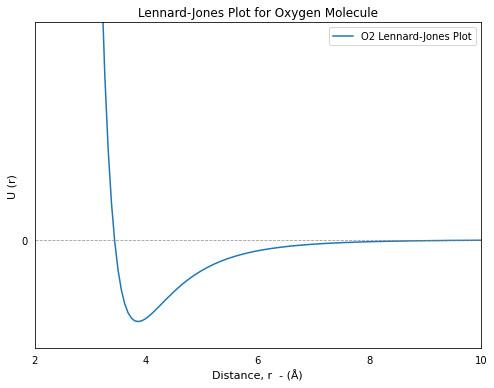

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
r = np.linspace(3.2, 15, 200)
eps = 113
sig = 3.433

ax.plot(r, (4*eps*((sig/r)**12 - (sig/r)**6)), label='O2 Lennard-Jones Plot')

ax.axhline(0, color='grey', alpha=0.8, linestyle='--', linewidth=0.8)
plt.xlim(2, 10)
ax.set_xticks([2, 4, 6, 8, 10])
ax.tick_params(bottom=False)
plt.xlabel('Distance, r  - (Å)', size=11)

plt.ylim(-150, 300)
ax.set_yticks([-100, 0, 100, 200, 300])
ax.set_yticklabels(['', 0, '', '', ''])
ax.tick_params(left=False)
plt.ylabel('U (r)', size=11)

plt.title('Lennard-Jones Plot for Oxygen Molecule')
ax.legend()
plt.show()

If we rewrite the plot above as a function (which is made for oxygen), in terms of the initial parameters, we will be able to plot the Lennard-Jones Potential for any molecule. Below I have defined such a function, `LJPlot`. I have made a few changes to the graph, so that it shows more meaningful values:

In [5]:
def LJPlot(sig, eps, molecule_name):
    fig, ax = plt.subplots(figsize=(8, 6))
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)
    
    r = np.linspace(sig-0.15, sig+10, 200)
    
    ax.plot(r, (4*eps*((sig/r)**12 - (sig/r)**6)), label=str(molecule_name), linewidth = 1)

    for x in np.arange(sig+0.015, sig+10, 0.0001):
        if round(4*eps*((sig/x)**12 - (sig/x)**6), 2) == -1*eps:   ## Produces r value for minimum point on plot
            r_m = x
            ax.set_xticks([sig, r_m])
            ax.set_xticklabels([str(sig), str(round(r_m, 3))])
            plt.xticks(rotation=87)

    plt.xlim(round(sig-0.5, 1), round(sig+10, 1))         ## X axis changes
    ax.tick_params(bottom=False)
    plt.xlabel('Distance, r  - (Å)', size=11)
    
    ymin = min(4*eps*((sig/r)**12 - (sig/r)**6))          ## Y axis changes
    plt.ylim(ymin-30, ymin*(-1))
    ax.set_yticks([ymin, 0, -1*ymin])
    ax.set_yticklabels([str(round(ymin, 1)), 0, ''])
    ax.axhline(0, color='grey', alpha=0.8, linestyle='--', linewidth=0.8)
    ax.axhline(ymin, color='grey', alpha=0.5, linestyle='--', linewidth=0.7)
    ax.tick_params(left=False)
    plt.ylabel('U (r)', size=11)

    plt.title('Lennard-Jones Plot')
    ax.legend()
    plt.show()

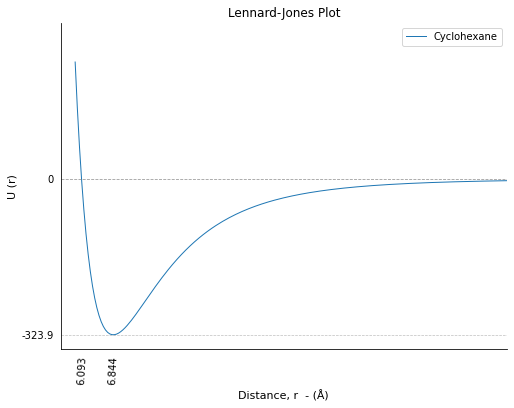

In [6]:
LJPlot(6.093, 324, 'Cyclohexane')

*All above values for lennard-jones parameters were taken from https://link.springer.com/content/pdf/bbm%3A978-1-4757-1696-2%2F1.pdf*

## The modified Benedict-Webb-Rubin Equation of State

This model is quite good, but flawed in some areas. The `(σ/r)^12` is quite simply incorrect and doesn't accurately predict repulsion when two molecules get very close. There have been many attempts to fit the simulation data for the Lennard-Jones fluid to an analytical equation of state, one of the more succesful methods is to use the modified Benedict-Webb-Rubin (MBWR) equation, which has 33 parameters. By considering the Lennard-Jones fluid, many corrections can be applied to the Lennard-Jones potential.<br>
By fitting the equation to simulations we arrive at an equation that is much simpler to split up into seperate components. Here I will use the ideas outlined by J. Karl Johnson, John A. Zollweg and Keith E. Gubbins in their 1992 paper. 

To plot the saturation densities of a Lennard-Jones fluid I will need the following equation:
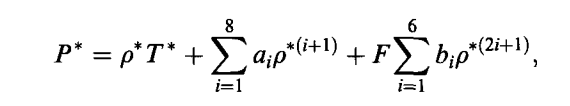<br>

The data required for plotting these points will have to be transferred into a set of defined variables, which has been done below:

In [7]:
#The X parameters for later

x1 = 0.8623085097507421
x2 = 2.976218765822098
x3 = -8.402230115796038
x4 = 0.1054136629203555
x5 = -0.8564583828174598
x6 = 1.582759470107601
x7 = 0.7639421948305453
x8 = 1.753173414312048
x9 = 2.798291772190376 * 10**3
x10 = -4.8394220260857657 * 10**-2
x11 = 0.9963265197721935
x12 = -3.698000291272493 * 10**1
x13 = 2.084012299434647 * 10**1
x14 = 8.305402124717285*10**1
x15 = -9.574799715203068 * 10**2
x16 = -1.477746229234994 * 10**2
x17 = 6.398607852471505 * 10**1
x18 = 1.603993673294834 * 10**1
x19 = 6.805916615864277 * 10**1
x20 = -2.791293578795945 * 10**3
x21 = -6.245128304568454
x22 = -8.116836104958410 * 10**3
x23 = 1.488735559561229 * 10**1
x24 = -1.059346754655084 * 10**4
x25 = -1.131607632802822 * 10**2
x26 = -8.867771540418822 * 10**3
x27 = -3.986982844450543 * 10**1
x28 = -4.689270299917261 * 10**3
x29 = 2.593535277438717 * 10**2
x30 = -2.694523589434903 * 10**3
x31 = -7.218487631550215 * 10**2
x32 = 1.721802063863269 * 10**2

In [8]:
def ai(a_num, t_value):
    T=t_value
    a1 = (x1*T + x2*math.sqrt(T) + x3 + x4/T + x5/(T**2))
    a2 = (x6*T + x7 + x8/T + x9/(T**2))
    a3 = (x10*T + x11 + x12/T)
    a4 = (x13)
    a5 = (x14/T + x15/(T**2))
    a6 = (x16/T)
    a7 = (x17/T + x18/(T**2))
    a8 = (x19/(T**2) ) 
    
    return  locals()[a_num]



def bi(a_num, t_value):
    T=t_value
    b1 = (x20/(T**2) + x21/(T**3))
    b2 = (x22/(T**2) + x23/(T**4))
    b3 = (x24/(T**2) + x25/(T**3))
    b4 = (x26/(T**2) + x27/(T**4))
    b5 = (x28/(T**2) + x29/(T**3))
    b6 = (x30/(T**2) + x31/(T**3) + x32/(T**4))
    
    return locals()[a_num]

In [9]:
def MBWR_TvD():
    P = 0.018
    ρvalues = np.linspace(0.05, 0.85, 40)
    
    def eq_solve():
        
        values_of_T = []
        
        for ρ in ρvalues:

            Tdif_list = []
            
            
            for T in np.linspace(0.6, 1.4, 1000):
                comp_i = 0
                comp_j = 0
            
                for i in range(1, 9):                        #Repeats process to produce final summation values
                
                    comp_i += ai('a{}'.format(i), T) * (ρ**(i+1))
                    
                
                    if i > 2:
                        z=0
                        z += bi('b{}'.format(i-2), T) * (ρ**(2*(i-2) + 1))
                        comp_j += z
                        
                comp_j *= np.exp(-3*(ρ**2))
                
                
                T_ρ = P - (comp_i + comp_j)
                Tdif_list.append(T*ρ - T_ρ)
            
            
            
            
            Tdif_abs = [abs(ele) for ele in Tdif_list]            #Absolute value of difference list
            Tdifmin = min(Tdif_abs)
            
            
            stepnum = Tdif_abs.index(Tdifmin) + 1
            
            
            Tvalue_at_ρ = 0.6 + stepnum*(0.8/1000)
            values_of_T.append(Tvalue_at_ρ)
            
            
        return values_of_T
    
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(ρvalues, eq_solve())
    plt.ylabel('Reduced Temperature')
    plt.ylim(0.7, 1.3)
    ax.tick_params(left=False)
    ax.set_yticks([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])
    ax.set_yticklabels([0.7, 0.8, 0.9, 1.0, 1.1, 1.2, ''])
    
    for side in ['top', 'right']:
        ax.spines[side].set_visible(False)
    
    plt.xlim(0.1, 0.9)
    plt.xlabel('Reduced Density')
    ax.tick_params(bottom=False)
    ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    ax.set_xticklabels(['', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ''])
    
    plt.title('Saturation Density Plot')
    plt.show()

In [90]:
from scipy.optimize import newton

def MBWR_TvD2():
    P = 0
    ρvalues = np.linspace(0.01, 0.871, 1000)
    Tsol = []
    
    for ρ in ρvalues:
        
        F = np.exp(-3*(ρ**2))
        
        def f(T):
            return (ρ+x1*ρ**2+x10*ρ**4+x6*ρ**3)* T**5   +   (x2*ρ**2)* T**(9/2)   +   (x3*(ρ**2)+x7*(ρ**3)+x11*(ρ**4)+x13*(ρ**5))* T**4   +   (x4*ρ**2+x8*ρ**3+x12*ρ**4+x14*ρ**6+x16*ρ**7+x17*ρ**8)* T**3    +   (x5*ρ**2+x9*ρ**3+x20*F*ρ**3+x22*F*ρ**5+x15*ρ**6+x24*F*ρ**7+x18*ρ**8+x19*ρ**9+x26*F*ρ**9+x28*F*ρ**11+x30*F*ρ**13)* T**2   +   (x21*F*ρ**3+x25*F*ρ**7+x29*F*ρ**11+x31*F*ρ**13)* T   +   (x23*F*ρ**5+x27*F*ρ**9+x32*F*ρ**13)
        
        def fprime(T):
            return 5*(ρ+x1*ρ**2+x10*ρ**4+x6*ρ**3)* T**4  +  (9/2)*(x2*ρ**2)* T**(7/2)  +   4*(x3*(ρ**2)+x7*(ρ**3)+x11*(ρ**4)+x13*(ρ**5))* T**3   +   3*(x4*ρ**2+x8*ρ**3+x12*ρ**4+x14*ρ**6+x16*ρ**7+x17*ρ**8)* T**2    +   2*(x5*ρ**2+x9*ρ**3+x20*F*ρ**3+x22*F*ρ**5+x15*ρ**6+x24*F*ρ**7+x18*ρ**8+x19*ρ**9+x26*F*ρ**9+x28*F*ρ**11+x30*F*ρ**13)* T   +   (x21*F*ρ**3+x25*F*ρ**7+x29*F*ρ**11+x31*F*ρ**13)
   
        
        Tsol.append(newton(f, x0=1.3, fprime=fprime, tol=0.000000000001, disp=True, maxiter=1000))
             
    
    fig, ax = plt.subplots(figsize=(8,6))
    print(Tsol)
    ax.plot(ρvalues, Tsol)
    plt.show()

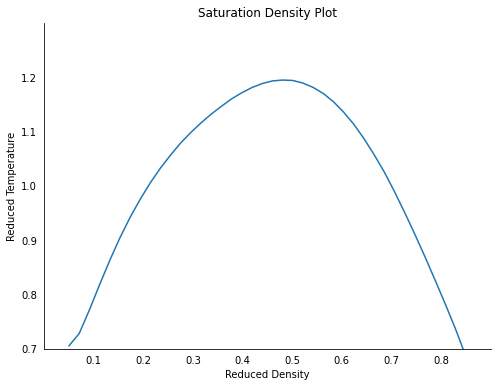

In [44]:
MBWR_TvD()